In [19]:
#this file is for designing model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
#preprocessing
def preprocessing(predict=None):
    
    train=pd.read_csv("/content/drive/MyDrive/csv files/PN.csv")
    train['sentiment']=train['sentiment'].replace(('positive','negative'), (1,0))
    train=train.to_numpy()
    np.random.seed(42)
    np.random.shuffle(train)
    test=pd.read_csv("/content/drive/MyDrive/csv files/PNtest.csv")
    test['sentiment']=test['sentiment'].replace(('Satisfied','Dissatisfied'), (1,0))
    test=test.to_numpy()
    np.random.seed(42)
    np.random.shuffle(test)
    train_X=train[:,0]
    train_Y=train[:,1]
    test_X=test[:,0]
    test_Y=test[:,1]
    test_Y=tf.convert_to_tensor(test_Y,dtype=tf.float32)
    train_Y=tf.convert_to_tensor(train_Y,dtype=tf.float32)
    
    
    #Tokenization
    embedding_dim = 150
    max_length = 200
    trunc_type='post'
    padding_type='post'
    oov_tok = "<OOV>"
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(train_X)
    word_index=tokenizer.word_index
    vocab_size=len(word_index)
    train_sequences=tokenizer.texts_to_sequences(train_X)
    train_padded=pad_sequences(train_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

    test_sequences=tokenizer.texts_to_sequences(test_X)
    test_padded=pad_sequences(test_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)
    
    if predict != None :
            model = tf.keras.models.load_model('model1.h5')
            ar=np.array([predict])
            ar=test_sequences=tokenizer.texts_to_sequences(ar)
            ar=pad_sequences(ar,maxlen=max_length,padding=padding_type,truncating=trunc_type)
            return model.predict(ar)[0]
    
    return embedding_dim,max_length,trunc_type,padding_type,vocab_size,word_index,train_padded,test_padded,train_Y,test_Y

In [38]:
#model
def model(vocab_size,embedding_dim,max_length,train_padded,test_padded,train_Y,test_Y):
    model=tf.keras.Sequential([
        tf.keras.layers.Embedding((vocab_size+1),embedding_dim,input_length=max_length),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,dropout=0.2)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
     ])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    num_epochs=5
    history=model.fit([train_padded],train_Y,epochs=num_epochs,validation_data=([test_padded],test_Y),verbose=1)
    model=model.save("model1.h5")
    print("model saved succesfully")
    return history

In [39]:
#graph plot
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'], '')
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.title('Change of Accuracy over Epochs')
    plt.legend(['accuracy', 'val_accuracy'])
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'], '')
    plt.xlabel("Epochs")
    plt.ylabel('loss')
    plt.title('Change of loss over Epochs')
    plt.legend(['loss', 'val_loss'])
    plt.show()

In [45]:
#preprocessing
embedding_dim,max_length,trunc_type,padding_type,vocab_size,word_index,train_padded,test_padded,train_Y,test_Y=preprocessing()

Epoch 1/5
1563/1563 [==============================] - 944s 602ms/step - loss: 0.5161 - accuracy: 0.7269 - val_loss: 0.8084 - val_accuracy: 0.5155
Epoch 2/5
1563/1563 [==============================] - 936s 599ms/step - loss: 0.2205 - accuracy: 0.9179 - val_loss: 0.9063 - val_accuracy: 0.5031
Epoch 3/5
1563/1563 [==============================] - 934s 597ms/step - loss: 0.1213 - accuracy: 0.9569 - val_loss: 0.9493 - val_accuracy: 0.5217
Epoch 4/5
1563/1563 [==============================] - 938s 600ms/step - loss: 0.0643 - accuracy: 0.9795 - val_loss: 1.0938 - val_accuracy: 0.5404
Epoch 5/5
1563/1563 [==============================] - 939s 601ms/step - loss: 0.0396 - accuracy: 0.9870 - val_loss: 1.2460 - val_accuracy: 0.5652
model saved succesfully


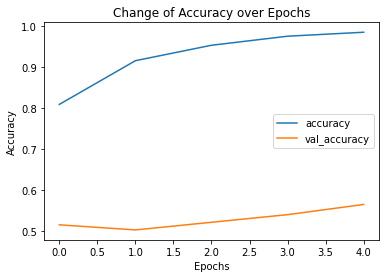

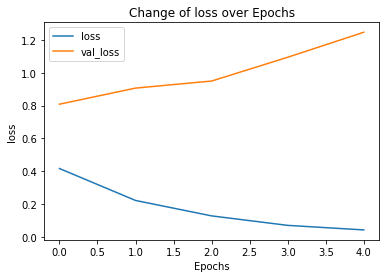

In [11]:
#training
history=model(vocab_size,embedding_dim,max_length,train_padded,test_padded,train_Y,test_Y)
#results
plot(history)

In [21]:
preprocessing(predict="I hate this movie")

array([0.39192274], dtype=float32)